In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [7]:
np.random.seed(12)

races = ['asian', 'black', 'hispanic', 'white']

# Generate random data
voter_race = np.random.choice(a = races,
                              p = [0.1, 0.15 ,0.25, 0.5],
                              size = 1000)

voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

# Group age data by race
voters = pd.DataFrame({'race': voter_race, 'age': voter_age})
groups = voters.groupby('race').groups

# Extract individual groups
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
white = voter_age[groups['white']]

# Perform the ANOVA
f_val, p_val = stats.f_oneway(asian, black, hispanic, white)

# The test output indicates there is no significant difference between the means of each group
print 'F-value: {0}'.format(round(f_val, 2))
print 'p-value: {0}'.format(round(p_val, 2))

F-value: 1.38
p-value: 0.25


In [8]:
# Make new age data where the group means do differ
white_age = stats.poisson.rvs(loc=18, mu=32, size=1000)

voter_age = np.where(voter_race == 'white', white_age, voter_age)

# Group age data by race
voters = pd.DataFrame({'race': voter_race, 'age': voter_age})
groups = voters.groupby('race').groups

# Extract individual groups
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
white = voter_age[groups['white']]

# Perform the ANOVA
f_val, p_val = stats.f_oneway(asian, black, hispanic, white)

# The test result suggests the groups have different sample means, since p-value is significant at a 99% confidence level
print 'F-value: {0}'.format(round(f_val, 2))
print 'p-value: {0}'.format(round(p_val, 4))

F-value: 9.06
p-value: 0.0


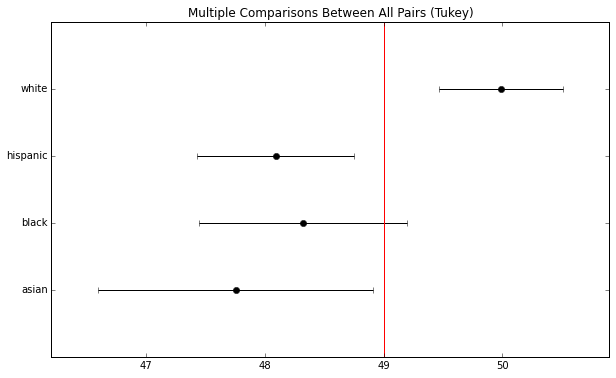

In [9]:
# Tukey's post hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
%matplotlib inline

tukey = pairwise_tukeyhsd(endog=voter_age, 
                          groups=voter_race, 
                          alpha=0.05)

# Plot group confidence intervals
tukey.plot_simultaneous()    
plt.vlines(x=49, ymin=-10, ymax=10, color='red')

In [10]:
print(tukey.summary()) 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower  upper  reject
------------------------------------------------
 asian    black    0.5661  -1.4384 2.5706 False 
 asian   hispanic  0.3357  -1.4937 2.1651 False 
 asian    white    2.2328   0.5308 3.9348  True 
 black   hispanic -0.2304  -1.7901 1.3293 False 
 black    white    1.6667   0.2585 3.0748  True 
hispanic  white    1.8971   0.7518 3.0423  True 
------------------------------------------------
